## k Nearest Neighbors (kNN)
The __k-Nearest Neighbors (kNN)__ algorithm is a simple and effective way to classify data. It is
an example of instance-based learning which requires instances of data close at hand to perform the machine learning algorithm. <br>
This algorithm has to carry around the full dataset; for large datasets, it implies a large amount of storage. In addition, you need to calculate the distance measurement for every piece of data in the database, and this can be cumbersome. <br>
An additional drawback is that kNN doesn’t give you any idea of the underlying structure of the data, you have no idea what an “average” or “exemplar” instance from each class looks like. 
### 1. Simple kNN model 
The following provides the code that achieves simple dot classification which helps to better understand the basic concept and working mechanism of a k-Nearest Neighbor (kNN) model.

In [1]:
import numpy as np

In [2]:
def generateDataset():
    data = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    
    return data, labels

In [3]:
def kNNClassifier(newData, data, labels, k):
    # Step 1: distance calculation
    
    # get the number of existed data samples
    dataSize = data.shape[0] 
    # construct an array by repeating query data the same number of times as 
    # the number of existed data samples
    newDataRep = np.tile(newData, (dataSize, 1))
    # calculate the Euclidean distance between the query data and existed data
    squareDiff = (newDataRep-data) ** 2
    distance = squareDiff.sum(axis=1) ** 0.5
    # sort the calculated Euclidean distance by data index
    # Ex. if a=array([1.28, 1.13, 0.13, 0.08]), the result of 
    # a.argsort() will be array([3, 2, 1, 0], dtype=int64)
    sortDistanceIdx = distance.argsort()
    
    # Step 2: Voting with the lowest k distances
    
    # the dict which stores the labels of the k nearest data and their number 
    # of appearances
    classCount = {}
    for i in range(k):
        # get the i-th nearest data's corresponding label
        lowDistanceLabels = labels[sortDistanceIdx[i]]
        # increase the number of appearances for the i-th label
        classCount[lowDistanceLabels] = classCount.get(lowDistanceLabels,0)+1
    
    # Step 3: Sort the dict in the descending order of value
    # Ex. dict1 = {'a':3, 'b':3, 'c':2, 'd':0}, the result of
    # sorted(dict1.items(), key=lambda x:x[1], reverse=True) will be
    # [('a', 3), ('b', 3), ('c', 2), ('d', 0)]
    sortClassCount = sorted(classCount.items(), key=lambda x:x[1], reverse=True)
    
    return sortClassCount[0][0]

In [4]:
data, labels = generateDataset()

In [5]:
kNNClassifier([0.2, 0.3], data, labels, k=3)

'B'

### 2. Real-world applications of kNN model
### 2.1 Improving matches from a dating site use kNN
The data is provided by a customer who use the dating site. It has been stored in a text file called datingDataSet.txt and contains 1,000 entries. A new sample is on each line with the following features: <br>
- Number of frequent flyer miles earned per year
- Percentage of time spent playing video games
- Liters of ice cream consumed per week

According to the provided features, the customer labeled those people as 3 different types: <br>
- People that the customer didn’t like
- People that the customer liked in small doses
- People that the customer liked in large doses

Now, we are going to create a classifier that can help this customer filtering future entries to categorize them. <br>
#### Step 1: Before we can use this data in our classifier, we need to change it to the format that our classifier accepts.

In [6]:
# This function takes a filename string and outputs two things: a matrix of
# training examples and a vector of class labels.
def readFile(fileName):
    with open(fileName, encoding='utf-8', mode='r') as f:
        # create a 2-D Numpy matrix that save features of each existed entry
        featureMatrix = np.zeros((len(f.readlines()), 3))
        # create a list to save the label of each existed entry
        labels = []
        
        # set the file pointer to its original position
        f.seek(0)  
        
        # parse line to a list
        index = 0
        for line in f:
            line = line.strip()
            # split the line into a list of elements delimited by'\t'.
            featureList = line.split('\t')
            
            featureMatrix[index] = featureList[0:3]
            labels.append(featureList[-1]) 
            index += 1
    
    return featureMatrix, labels

In [7]:
featureMatrix, labels = readFile('files/datingDataSet.txt')

In [8]:
featureMatrix

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [9]:
labels[0:5]

['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike']

#### Step 2: Data's feature visualization with Matplotlib.

In [10]:
import matplotlib
import matplotlib.pyplot as plt

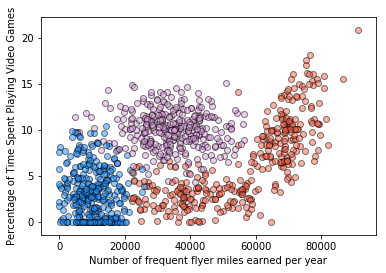

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(len(labels)):
    if labels[i] == 'largeDoses':
        ax.scatter(featureMatrix[i,0], featureMatrix[i,1], alpha=0.5, 
                   color='plum', edgecolors='black')#, marker='.')
    if labels[i] == 'smallDoses':
        ax.scatter(featureMatrix[i,0], featureMatrix[i,1], alpha=0.5, 
                   color = 'dodgerblue', edgecolors='black')#, marker='d')
    if labels[i] == 'didntLike':
        ax.scatter(featureMatrix[i,0], featureMatrix[i,1], alpha=0.5, 
                   color = 'tomato', edgecolors='black')
        
#ax.scatter(featureMatrix[:,0], featureMatrix[:,1])
#ax.set_xlabel('Number of frequent flyer miles earned per year')
#ax.set_ylabel('Percentage of Time Spent Playing Video Games')
plt.xlabel('Number of frequent flyer miles earned per year')
plt.ylabel('Percentage of Time Spent Playing Video Games')
plt.show()

#### Step 3: Data normalization (for numeric values).
When dealing with values that lie in different ranges, it’s common to normalize them.
Common ranges to normalize them to are 0 to 1 or -1 to 1. To scale everything from 0
to 1, we need to apply the following formula: <br>
__newValue = (oldValue-min)/(max-min)__ <br>
In the normalization procedure, the variables __min__ and __max__ are the smallest and largest
values in the dataset.

In [12]:
def dataNormalization(featureMatrix):
    featureMatrixNormalized = np.zeros(featureMatrix.shape)
    numOfData = featureMatrix.shape[0]
    # From the input numeric m*n feature matrix, get the min and max n feature values.
    # The 0 in .min(0) and .max(0) allows you to take the minimums or maximums from the columns.
    minVals = featureMatrix.min(0)
    maxVals = featureMatrix.max(0)
    
    ranges = maxVals - minVals
    # Since the input feature matirx has the size m*n, however, our min and max feature matrices
    # are with size 1*n. To overcome this, use np.tile() function to create a matrix the same size 
    # as our input, and then fill it up with many copies,
    featureMatrixNormalized = featureMatrix - np.tile(minVals, (numOfData,1))
    featureMatrixNormalized = featureMatrixNormalized / np.tile(ranges, (numOfData,1))
    
    return featureMatrixNormalized, ranges, minVals

In [13]:
featureMatrixNormalized, ranges, minVals = dataNormalization(featureMatrix)

In [14]:
featureMatrixNormalized

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [15]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [16]:
minVals

array([0.      , 0.      , 0.001156])

#### Step 4: Class prediction with kNN model on randomly selected test data.
Take the last 90% entries from the dataset to train the classifier. Then take the remaining 10%
to test the classifier and see how accurate it is.

In [17]:
def datingClassPredictTestkNN(fileName, testRatio=0.10, k=3):
    featureMatrix, labels = readFile(fileName)
    featureMatrixNormalized, ranges, minVals = dataNormalization(featureMatrix)
    
    numOfData = featureMatrix.shape[0]
    numOfTestData = int(testRatio * numOfData)
    
    errorCount = 0
    for i in range(numOfTestData):
        result = kNNClassifier(featureMatrixNormalized[i, :], \
                               featureMatrixNormalized[numOfTestData:numOfData, :], \
                               labels[numOfTestData:numOfData], k)
        print('The predicted dating class is: %s, the true dating class is: %s' \
              %(result, labels[i]))
        
        if result!=labels[i]: errorCount+=1
            
    errorRate = errorCount/float(numOfTestData)
    print('Total error rate: %f' %errorRate)
    
    return errorRate

In [18]:
errorRate = datingClassPredictTestkNN(fileName='files/datingDataSet.txt', k=5)

The predicted dating class is: largeDoses, the true dating class is: largeDoses
The predicted dating class is: smallDoses, the true dating class is: smallDoses
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: largeDoses, the true dating class is: largeDoses
The predicted dating class is: largeDoses, the true dating class is: largeDoses
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: largeDoses, the true dating class is: largeDoses
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: didntLike, the true dating class is: didntLike
The predicted dating class is: smallDoses, the true da

#### Step 5: Create a dating site predictor with kNN

In [19]:
def datingSitePredictorKNN(oldDataFile, k=3):
    frequentFlyerMiles = float(input('Please enter the number of frequent flyer miles earned per year:'))
    videoGamesTime = float(input('Please enter the percentage of time spent playing video games:'))
    iceCream = float(input('Please enter the liters of ice cream consumed per week:'))
    newData = np.array([frequentFlyerMiles, videoGamesTime, iceCream])
    
    oldData, labels = readFile(oldDataFile)
    oldDataNormalized, ranges, minVals = dataNormalization(oldData)
    newDataNormalized = (newData-minVals)/ranges
    
    result = kNNClassifier(newDataNormalized, oldDataNormalized, labels, k)
    print('This person belongs to the category: %s' %result)

In [20]:
datingSitePredictorKNN(oldDataFile='files/datingDataSet.txt', k=3)

Please enter the number of frequent flyer miles earned per year:10
Please enter the percentage of time spent playing video games:1000
Please enter the liters of ice cream consumed per week:100
This person belongs to the category: didntLike


### 2.2  Handwriten digits (0-9) recognition use kNN
The digits were processed through image-processing software to make them all the same size and color. They’re all 32x32 black and white. Images are stored in txt files, there are roughly 200 samples of each digit from 0 to 9. The training set contains about 2,000 examples and the test set contains about 900 examples.
#### Step 1: Converting images into test vectors

In [21]:
def convert_to_vector(fileName):
    result_vector = np.zeros((1, 32*32))
    with open(fileName, encoding='utf-8', mode='r') as f:
        pointer = 0
        for line in f:
            num_str = line.strip()
            for i in range(len(num_str)):
                result_vector[0][32*pointer+i] = int(num_str[i])
            pointer += 1
    
    return result_vector

In [22]:
test_vec = convert_to_vector('files/digits/testDigits/0_13.txt')

In [23]:
test_vec[0, 0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Step 2: Test kNN model on handwritten digits

In [24]:
import os
from os import listdir

In [25]:
def handwrittenDigitsPredictKNN(fileDir, k=3):
    # load digits and their corresponding labels from the training set
    train_labels = []
    trainingFileDir = os.path.join(fileDir, 'trainingDigits')
    trainingFileNames = listdir(trainingFileDir)
    trainingSetVectors = np.zeros((len(trainingFileNames), 32*32))
    
    for i in range(len(trainingFileNames)):
        train_labels.append(trainingFileNames[i][0])
        trainingSetVectors[i][:] = convert_to_vector(os.path.join(trainingFileDir, \
                                                                  trainingFileNames[i]))
        
    # load digits from the test set and perform classification using kNN
    errorCount = 0
    testFileDir = os.path.join(fileDir, 'testDigits')
    testFileNames = listdir(testFileDir)
    testSetVectors = np.zeros((len(testFileNames), 32*32))
    
    for i in range(len(testFileNames)):
        testSetVectors = convert_to_vector(os.path.join(testFileDir, \
                                                        testFileNames[i]))
        predictResult = kNNClassifier(testSetVectors, trainingSetVectors, train_labels, k)
        
        print('Predicted result: %s, True Label: %s' %(predictResult, testFileNames[i][0]))
        
        if (predictResult != testFileNames[i][0]): errorCount += 1
    
    print('The total number of wrongly predicted case is: %d' %errorCount)
    print('Error rate: %.3f' %(float(errorCount)/len(testFileNames)))

In [26]:
handwrittenDigitsPredictKNN('files/digits')

Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 0,

### 2.3  Iris classification use kNN
We want to use a classic Iris dataset to build a machine learning model to predict the species of iris.

#### Step 1: Load the dataset

In [27]:
from sklearn.datasets import load_iris

In [28]:
def loadIrisDataset():
    iris_dataset = load_iris()
    # Simple explanation of the iris dataset
    print(iris_dataset['DESCR'][:193] + "\n...")
    print('------------------------------------------------------------')
    print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
    print("Target names:", iris_dataset['target_names'])
    print("Feature names:",iris_dataset['feature_names'])
    print("Data type:", type(iris_dataset['data']))
    print("Data shape:", iris_dataset['data'].shape)
    print("Type of target:", type(iris_dataset['target']))
    print("Target shape:", iris_dataset['target'].shape)
    print("Target:\n", iris_dataset['target'])
    
    return iris_dataset

In [29]:
iris_dataset = loadIrisDataset()

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...
------------------------------------------------------------
Keys of iris_dataset: dict_keys(['target_names', 'data', 'feature_names', 'target', 'DESCR'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data type: <class 'numpy.ndarray'>
Data shape: (150, 4)
Type of target: <class 'numpy.ndarray'>
Target shape: (150,)
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In __iris_dataset['target']__, iris species have been transfered into integers for 0 to 2:

In [31]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


The corresponding label name of the above numbers is given by __iris ['target'names']__: 0 for setosa, 1 for versicolor, and 2 for virginica.
#### Step 2: Training and test set separation
__train_test_split__ function in __scikit-learn__ can disrupt and split the data sets into training and test set with specific ratio.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
def trainTestSeparate(dataset, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], \
                                                        iris_dataset['target'], \
                                                        test_size=test_size, random_state=0)
    print("X_train shape: {}".format(X_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("X_test shape: {}".format(X_test.shape))
    print("y_test shape: {}".format(y_test.shape))
    
    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = trainTestSeparate(iris_dataset, test_size=0.2)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


#### Step 3: Data visualization using pair plot
One of the best ways to examine data is to visualize it. A popular visualization method is using scatter plot. <br>
In scatter plot, one feature is regarded as x-axis and the other as y-axis, each data is shown as a point on the diagram. Unfortunately, computer screens have only two dimensions, so we can only draw 2 features (or maybe 3) at a time. Therefore, it is difficult to map data points with more than 3 features using this method. <br>
One way to solve this problem is to draw a pair plot so that all the features can be viewed in pairs. If the number of features is small (4 in our case), this method is very reasonable. <br>
But you should keep in mind that pair plot cannot show the relationship between all features at the same time, so this visualization method may not be able to show some interesting content of data. <br>

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [36]:
def createPairPlot(dataset, test_size=0.2):
    X_train, X_test, y_train, y_test = trainTestSeparate(dataset, test_size=test_size)
 
    iris_dataframe = pd.DataFrame(X_train, columns=dataset.feature_names)
    # create pair plots use the generated dataframe
    colors = ('plum', 'dodgerblue', 'tomato')
    cmap = ListedColormap(colors, np.unique(y_train))
    grid = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), \
                                      hist_kwds={'bins':20,'facecolor':'b','alpha':0.5,'edgecolor':'b'},\
                                      marker='o', s=60, alpha=0.8, cmap=cmap, edgecolor='black')
    
    plt.show()

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


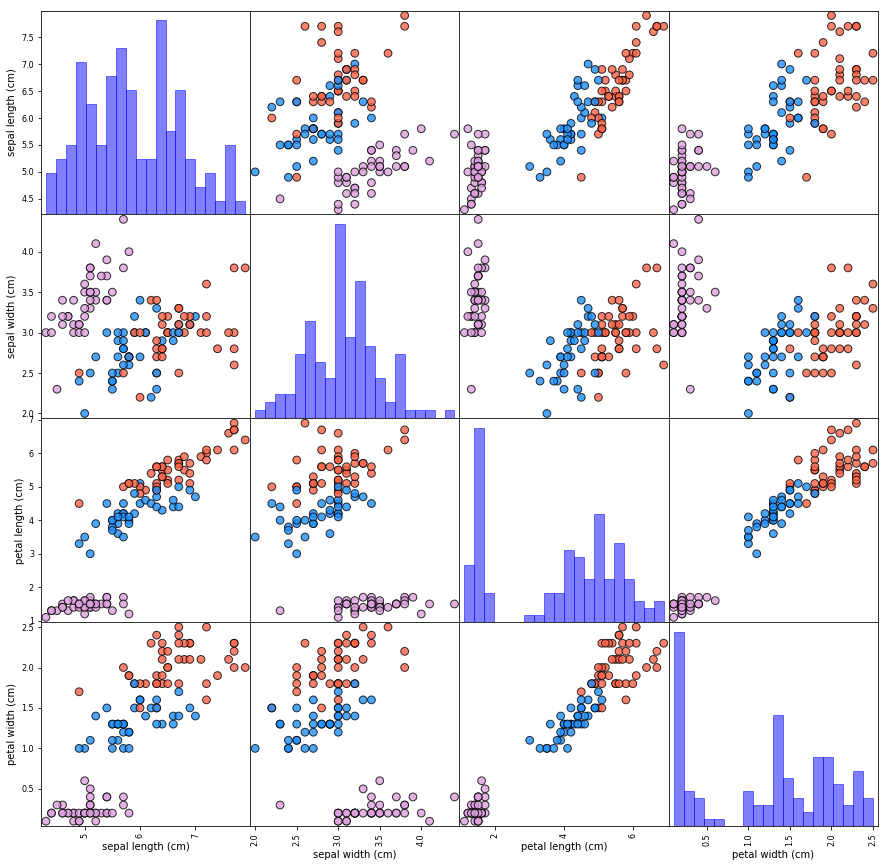

In [37]:
createPairPlot(iris_dataset, test_size=0.2)

As shown from the above pair plot, the measurement data of petal and sepal can distinguish the 3 iris species. This indicates that kNN are likely to learn to classify them with the input features.
#### Step 4: Predict iris class use kNN

In [38]:
def irisPredictKNN(dataset, test_size=0.2, k=3):
    # dataset separation
    X_train, X_test, y_train, y_test = trainTestSeparate(dataset, test_size=test_size)
    
        
    # get from the test set one by one and perform classification using kNN
    errorCount = 0
    print('Predicting Starts'.center(50, '-'))
    for i in range(len(y_test)):
        predictResult = kNNClassifier(X_test[i], X_train, y_train, k)
        
        print('Predicted result: %s, True Label: %s' %(predictResult, y_test[i]))
        
        if (predictResult != y_test[i]): errorCount += 1
    
    print('The total number of wrongly predicted case is: %d' %errorCount)
    print('Error rate: %.3f' %(float(errorCount)/len(y_test)))

In [39]:
irisPredictKNN(iris_dataset, test_size=0.2, k=3)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)
----------------Predicting Starts-----------------
Predicted result: 2, True Label: 2
Predicted result: 1, True Label: 1
Predicted result: 0, True Label: 0
Predicted result: 2, True Label: 2
Predicted result: 0, True Label: 0
Predicted result: 2, True Label: 2
Predicted result: 0, True Label: 0
Predicted result: 1, True Label: 1
Predicted result: 1, True Label: 1
Predicted result: 1, True Label: 1
Predicted result: 2, True Label: 2
Predicted result: 1, True Label: 1
Predicted result: 1, True Label: 1
Predicted result: 1, True Label: 1
Predicted result: 2, True Label: 1
Predicted result: 0, True Label: 0
Predicted result: 1, True Label: 1
Predicted result: 1, True Label: 1
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 2, True Label: 2
Predicted result: 1, True Label: 1
Predicted result: 0, True Label: 0
Predicted result: 0, True Label: 0
Predicted result: 2, 

#### Step 5: Predict on new case

In [40]:
# Suppose we have a new iris data as follows:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [41]:
predictClassIdx = kNNClassifier(X_new, X_train, y_train, k=3)
print('Prediction: ', predictClassIdx)
print('Predicted iris class name: ', iris_dataset['target_names'][predictClassIdx])

Prediction:  0
Predicted iris class name:  setosa
